## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedata=pd.merge(mouse_metadata,study_results,on='Mouse ID')

# Display the data table for preview
mergedata.head()
# mergedata.dtypes


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
micecount=len(mergedata['Mouse ID'].unique())
micecount

249

In [12]:
# Create new dataframe from original
duplicate_df=mergedata

# Create New ID column that concatenates Mouse ID and Timepoint
concatenate1=duplicate_df['Mouse ID']+duplicate_df['Timepoint'].map(str)

# Add New ID column to dataframe
duplicate_df['New ID']=concatenate1
duplicate_df

# Find duplicate mouse ID
# Source: https://www.codegrepper.com/code-examples/delphi/how+to+find+duplicate+values+in+pandas+column
find_dupe = duplicate_df[duplicate_df.duplicated(subset=['New ID'],keep=False)]

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
find_dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,New ID
908,g989,Propriva,Female,21,26,0,45.000000,0,g9890
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890
910,g989,Propriva,Female,21,26,5,48.786801,0,g9895
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895
912,g989,Propriva,Female,21,26,10,51.745156,0,g98910
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910
914,g989,Propriva,Female,21,26,15,51.325852,1,g98915
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915
916,g989,Propriva,Female,21,26,20,55.326122,1,g98920
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_frame=duplicate_df.drop(duplicate_df.loc[duplicate_df['Mouse ID'] == 'g989'].index)
print(clean_frame)

# Create new dataframe for clean data
clean_frame_master=pd.DataFrame(clean_frame)
clean_frame_master

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  New ID  
0              45.000000                 0   k4030  
1              38.825898                 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,New ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [15]:
# Checking the number of mice in the clean DataFrame.
micecount2=len(clean_frame_master['Mouse ID'].unique())
micecount2

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_frame_master.describe()

# Create new dataframe with only the columns I want
summary_stat=pd.DataFrame(clean_frame_master, columns=['Tumor Volume (mm3)','Drug Regimen'])
summary_stat


# Group new dataframe by Drug Regimen
group_summary = summary_stat.groupby(['Drug Regimen'])

# Calculate Totals
avgtumor=group_summary['Tumor Volume (mm3)'].mean()
mediantumor=group_summary['Tumor Volume (mm3)'].median()
variancetumor=group_summary['Tumor Volume (mm3)'].var()
stdtumor=group_summary['Tumor Volume (mm3)'].std()
semtumor=group_summary['Tumor Volume (mm3)'].sem()

# Create Summary Dataframe
summary_df=pd.DataFrame({'Avg Tumor Vol.':avgtumor,'Median Tumor Vol.':mediantumor,'Variance':variancetumor,'STD Dev':stdtumor,'SEM Tumor':semtumor})
summary_df

,Avg Tumor Vol.,Median Tumor Vol.,Variance,STD Dev,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# Source: https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby

print(summary_stat.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem']))

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

<IPython.core.display.Javascript object>


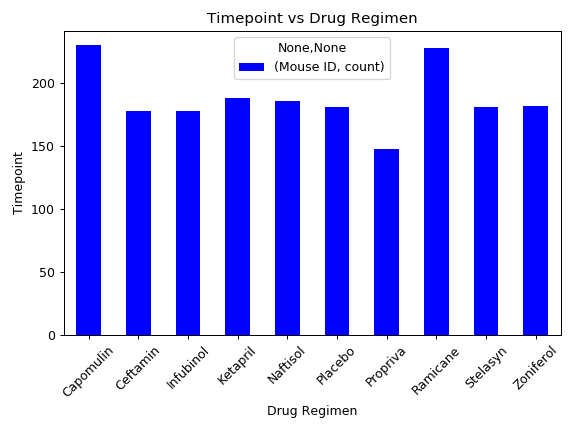

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Use clean dataframe and pull only the columns I want to use
bar1=pd.DataFrame(clean_frame_master, columns=['Mouse ID','Drug Regimen'])

# Group new dataframe
bar2=bar1.groupby(['Drug Regimen']).agg(['count'])

# Plot data on bar graph
barplot1=bar2.plot(kind='bar',facecolor='blue')
plt.title('Timepoint vs Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.show
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mergedata.count()
# getdupe=mergedata.groupby(['Mouse ID'])
# # getdupe.count()
# getdupe=pd.Series(mergedata['Mouse ID']).is_unique
# getdupe
# pd.Series(df['Student']).is_unique
# df = df[df.duplicated(subset=['val1','val2'], keep=False)]
# print (df)
#                          # Create new Dataframe with only New ID columns

#                             newID_df=pd.DataFrame(duplicate_df,columns=['New ID','New ID2'])
#                             newID_df
# equals true in case of no duplicates
# df1 = df['1st Column Name'].map(str) + df['2nd Column Name'].map(str) + ...
# Group New ID Dataframe by New ID column
#                             group_newID=newID_df.groupby(['New ID'])
#                             group_newID.count()

# find_dupe=pd.Series(concatenate['New ID']).is_unique
# find_dupe

# sort_newID=group_newID.sort_values('New ID2', ascending=False)

# sortallschooldata=all_school_data.sort_values('% Overall Passing',ascending=False)

# print(group_newID.sort_values('New ID2',ascending=False).sort_index(level=0,sort_remaining=False))

# print (df.sort_values('Total Compensation', ascending=False)
#          .sort_index(level=0, sort_remaining=False))
# DataFrame. sort_values(by, ascending) 
# group_newID.sort_values(['New ID2'], descending)

# locate_dupe=group_newID.loc[(group_newID['New ID2']>1)]
# pass_math_byschool=student_data_df.loc[(student_data_df['math_score']>=70)]
# sort_group=group_newID.sort_values(['New ID2'], ascending=False)
# sort_group.count()
                     
# # Count New ID field
# newIDcount=duplicate_df['New ID'].count()
# duplicate_df

# Count New ID column
#                 newIDcount


#                 newID1_df=pd.DataFrame(duplicate_df,columns=['New ID','New ID'])

# newID_df.rename(columns={})
# newID_df.groupby(['New ID'])
#                 newID_df
# goodgoodgood



# student_count=redo_group['Student ID'].count()

# dropdupes=duplicate_df.drop_duplicates('New ID')
# dropdupes
# df.drop_duplicates('student')


# score_group=redo_group.agg({"Student ID":'count',"math_score":'mean',"reading_score":'mean'})